In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [104]:
path = "/content/drive/MyDrive/Code/Hoctap/K1N3/BigData/BTL2/"
df = pd.read_csv(path+"data_cleaned.csv")

In [105]:
df['time'] = pd.to_datetime(df['time'])

## Biểu đồ tương quan

<ipython-input-37-ea799a0831f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = df.corr() * 100


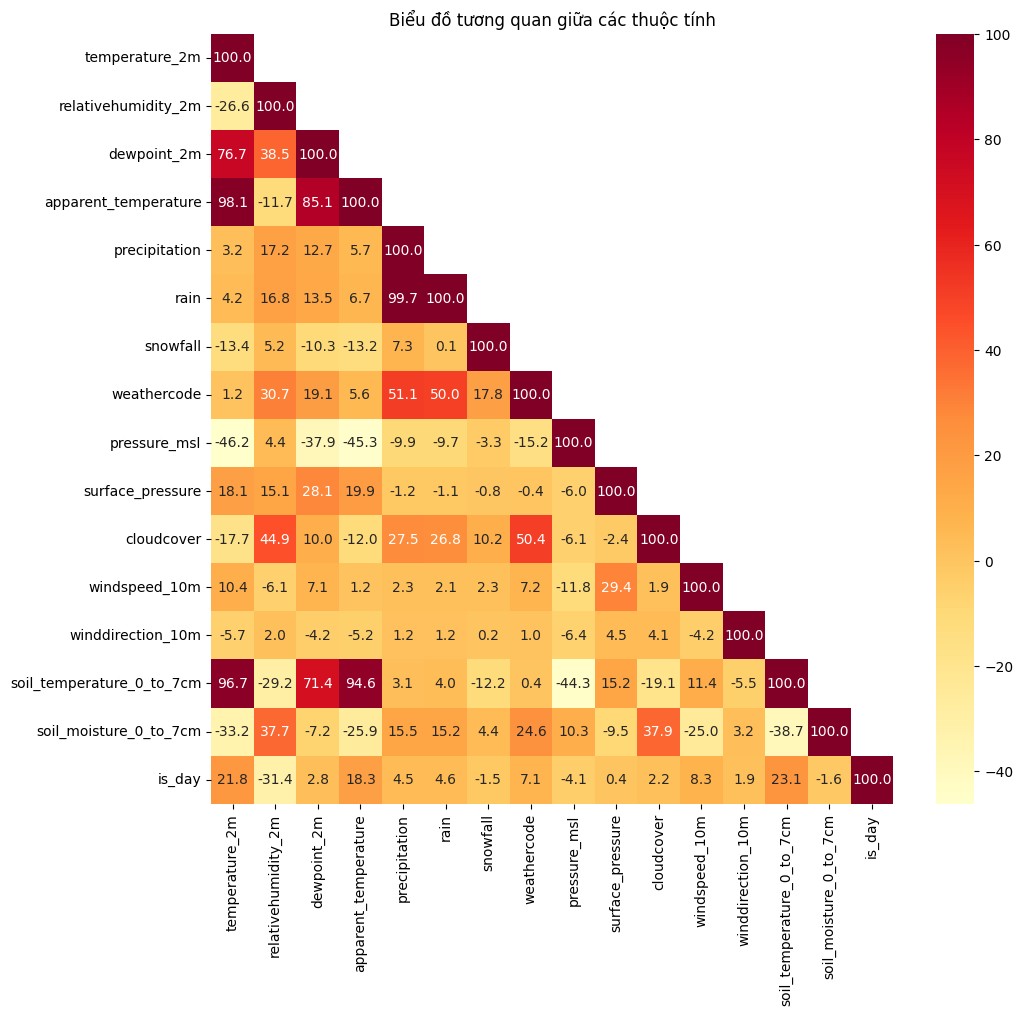

In [37]:
correlation_data = df.corr() * 100
plt.figure(figsize=(11,10))
sns.heatmap(correlation_data, annot=True, cmap="YlOrRd", \
            mask = np.triu(correlation_data, k=1), annot_kws={"size": 10}, fmt=".1f")
plt.title("Biểu đồ tương quan giữa các thuộc tính")
plt.show()

Có thể thấy temperature_2m, apparent_temperature, dewpoint_2m và soil_temperature_0_to_7cm có tương quan với nhau rất cao. Tất cả đều liên quan đến nhiệt độ và có mối quan hệ với nhau

Độ che phủ mây cũng ảnh hưởng tới một phần thời tiết và độ ẩm.

## Nhiệt độ

In [41]:
monthly_avg = df.groupby([df['time'].dt.year, df['time'].dt.month])\
            [['temperature_2m', 'apparent_temperature', 'dewpoint_2m','soil_temperature_0_to_7cm']].mean()
monthly_avg.index = monthly_avg.index.map(lambda x: f"{x[1]}-{x[0]}")
monthly_avg.index = pd.to_datetime(monthly_avg.index, format='%m-%Y')

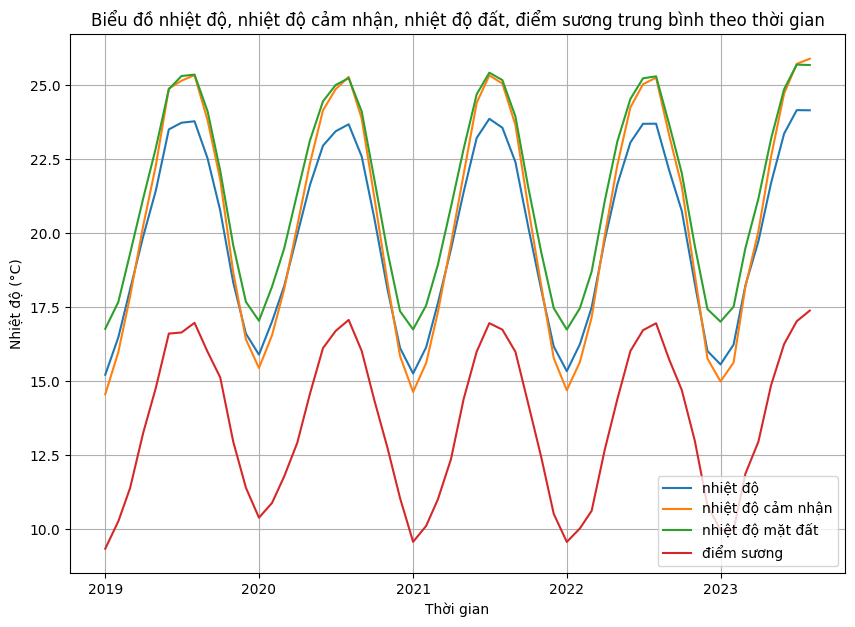

In [44]:
plt.figure(figsize=(10,7))
plt.plot(monthly_avg.index, monthly_avg.temperature_2m, label = "nhiệt độ")
plt.plot(monthly_avg.index, monthly_avg.apparent_temperature, label = "nhiệt độ cảm nhận")
plt.plot(monthly_avg.index, monthly_avg.soil_temperature_0_to_7cm, label = "nhiệt độ mặt đất")
plt.plot(monthly_avg.index, monthly_avg.dewpoint_2m, label = "điểm sương")
plt.legend()

plt.xlabel("Thời gian")
plt.ylabel("Nhiệt độ (°C)")
plt.title("Biểu đồ nhiệt độ, nhiệt độ cảm nhận, nhiệt độ đất, điểm sương trung bình theo thời gian")

plt.grid()
plt.show()

Nhiệt độ theo từng năm đều có 1 chu trình là lạnh vào mùa xuân, ấm dần và nóng vào giữa năm (tháng 6- tháng 8) rồi lạnh dần đến mùa đông.

Năm 2023 có sự chênh lệch về nhiệt độ, nhiệt độ cảm nhận cao nhất tức rõ rệt hơn hẳn so với các năm còn lại

Nhiệt độ mặt đất đa phần nóng hơn so với nhiệt độ cảm nhận, nhiệt độ, điểm sương. Vào mùa đông, nhiệt độ có thể chênh lệch khoảng 2°C so với nhiệt độ ngoài trời. Vì vậy một vài con vật biết tận dụng việc ở trong hang vào kì ngủ đông để giữa được nhiệt tốt hơn.

Nhiệt độ điểm sương lúc nào cũng thấp hơn so với 3 loại nhiệt độ trên khoảng 5-8 °C

Có thể thấy nhiệt độ cảm nhận dao động mạnh hơn so với nhiệt độ thực tế, vì vậy:

- Vào mùa hè, chúng ta sẽ cảm thấy nóng hơn khoảng 1 - 1.5 °C so với nhiệt độ dự báo
- Vào mùa đông, chúng ta sẽ cảm thấy lạnh hơn khoảng 0.5°C so với nhiệt độ dự báo

Lưu ý rằng điều này còn phụ thuộc vào lượng hơi ẩm trong không khí.

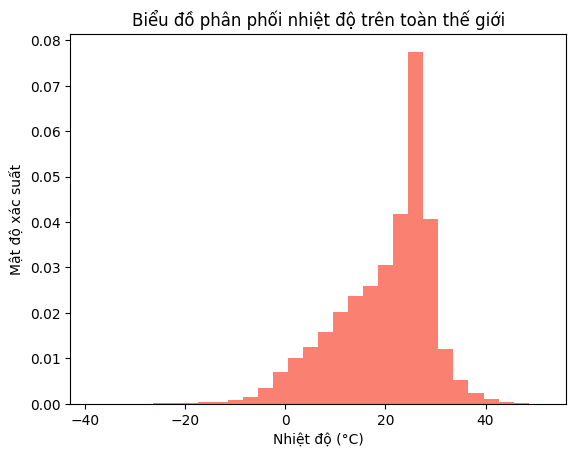

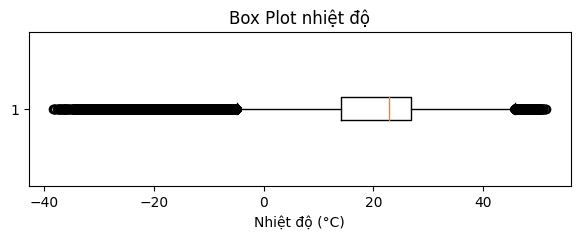

In [147]:

plt.hist(df.temperature_2m, bins=30, density=True, color='salmon')
plt.title('Biểu đồ phân phối nhiệt độ trên toàn thế giới')
plt.xlabel('Nhiệt độ (°C)')
plt.ylabel('Mật độ xác suất')
plt.figure(figsize=(7, 2))
plt.boxplot(df.temperature_2m, vert=False)
plt.title('Box Plot nhiệt độ')
plt.xlabel('Nhiệt độ (°C)')

plt.show()

Biểu đồ bị lệch trái. Mode khoảng 25 độ C

Nhiệt độ cao đa phần trong khoảng 0 đến 38

Nhiệt độ trên 42 và dưới -20 rất ít.

Như vậy có thể thấy các thành phố đa phần được xây dựng ở những nơi có điều kiện khí hậu tốt, có mức nhiệt phù hợp để sinh sống.

## Độ ẩm

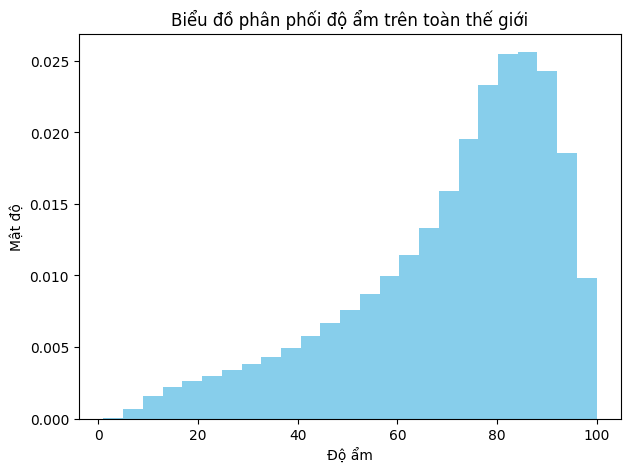

In [148]:
plt.figure(figsize=(7, 5))
plt.hist(df.relativehumidity_2m, bins=25, density=True, color='skyblue')
plt.title('Biểu đồ phân phối độ ẩm trên toàn thế giới')
plt.xlabel('Độ ẩm')
plt.ylabel('Mật độ')
plt.show()

Biểu đồ lệch trái. Đa phần độ ẩm đều cao, giá trị mode khoảng 85%

Độ ẩm như trên phù hợp với điều kiện sống của con người. Tuy nhiên nếu cao hoặc thấp quá đều không tốt. Nên để mức ổn định 40-80%

## Độ cao và áp suất

In [84]:
cities = pd.read_csv(path+"country_city_cleaned.csv")

In [81]:
surface_mean = df.groupby("City")['surface_pressure'].mean()
surface = pd.DataFrame(surface_mean)
merge_df = cities.merge(surface, how='inner', left_on="Capital", right_index=True)

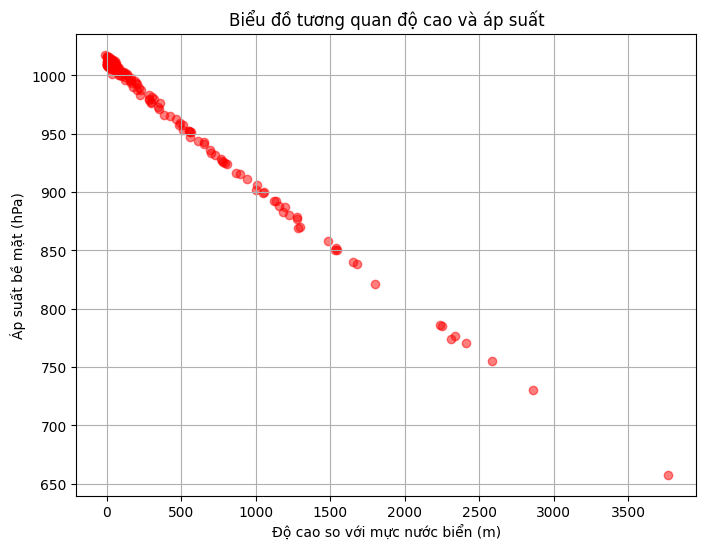

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(merge_df.elevation, merge_df.surface_pressure, marker = 'o', alpha = 0.5, c='r')
plt.xlabel("Độ cao so với mực nước biển (m)")
plt.ylabel("Áp suất bề mặt (hPa)")
plt.title("Biểu đồ tương quan độ cao và áp suất")
plt.grid()
plt.show()

Càng lên cao, áp suất càng giảm. Độ tương quan giữa 2 đại lượng này rất cao. Có thể thấy gần như là tuyến tính.

Ngoài ra có thể thấy càng lên cao, số lượng thành phố càng ít đi. Các thành phố lớn đa phần tập trung ở đồng bằng. Có nhiều nguyên nhân khiến ít thành phố lớn ở trên cao, chủ yếu là do điều kiện khí hậu, con đường vận chuyển nhu yếu phẩm và các thànhh phố xung quanh, áp suất không khí thấp thì tức nồng độ oxi trong không khí cũng loãng hơn.

## Lượng nước trong không khí

In [107]:
pre_mean_by_month = df.groupby(df['time'].dt.month)[['precipitation','rain','snowfall']].mean()

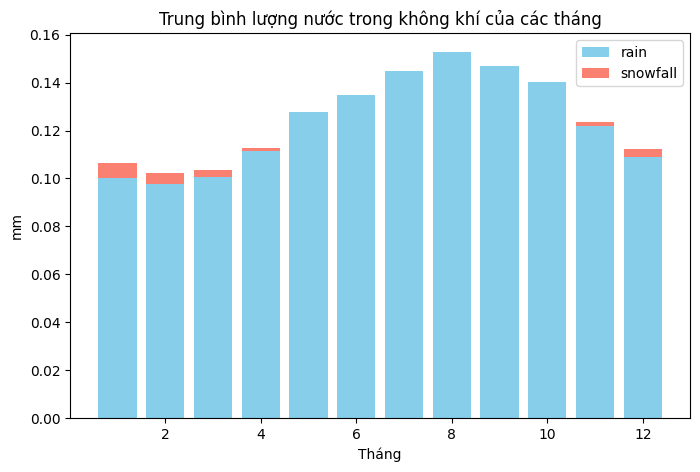

In [123]:
plt.figure(figsize=(8, 5))
plt.bar(pre_mean_by_month.index, pre_mean_by_month["rain"], label="rain", color = "skyblue")
plt.bar(pre_mean_by_month.index, pre_mean_by_month["snowfall"], label="snowfall", bottom=pre_mean_by_month["rain"], color='salmon')
plt.xlabel("Tháng")
plt.ylabel("mm")
plt.title("Trung bình lượng nước trong không khí của các tháng")
plt.legend()
plt.show()

Tháng 7- tháng 10 có lượng nước nhiều nhất trong năm. Đa phần vào mùa hè nên không có tuyết. Tuyết đa phần xuất hiện vào tháng 11 đến cuối tháng 4.

Từ biểu đồ trên cũng có thể thấy đa phần lượng nước trong không khí đến từ mưa là chủ yếu. Lượng tuyết rơi không nhiều.

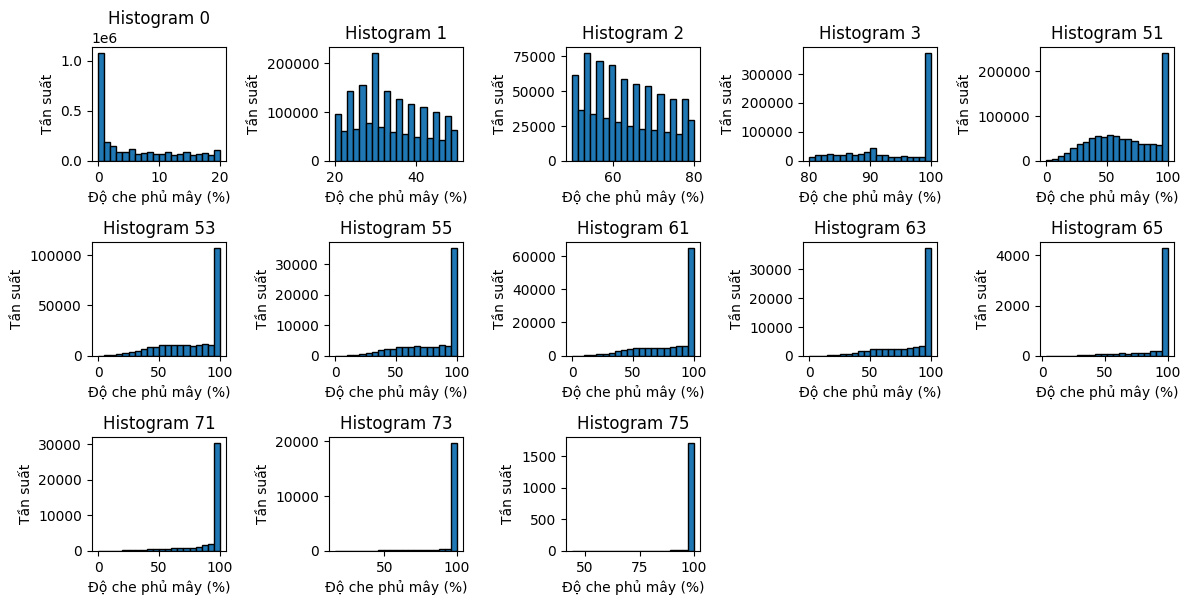

In [159]:
group_code = df.groupby(df.weathercode)
plt.figure(figsize=(12, 6))
idx = 1
for code, group in group_code:
    plt.subplot(3, 5, idx)
    plt.hist(group["cloudcover"], bins=20, edgecolor="black")
    plt.title(f"Histogram {code}")
    plt.xlabel("Độ che phủ mây (%)")
    plt.ylabel("Tần suất")
    idx+=1
plt.tight_layout()
plt.show()

Có thể thấy từ mã 3 trở đi, chủ yếu cloudcover đều là 100%. Tức lúc mưa, mây sẽ che phủ kín bầu trời

Từ đây có thể biết rằng mỗi khi mây dày, khả năng cao sẽ mưa

## Hướng gió chủ yếu ở Hà Nội

In [124]:
df_HN = df[df.City == "Hanoi"]
df_HN.shape

(40176, 18)

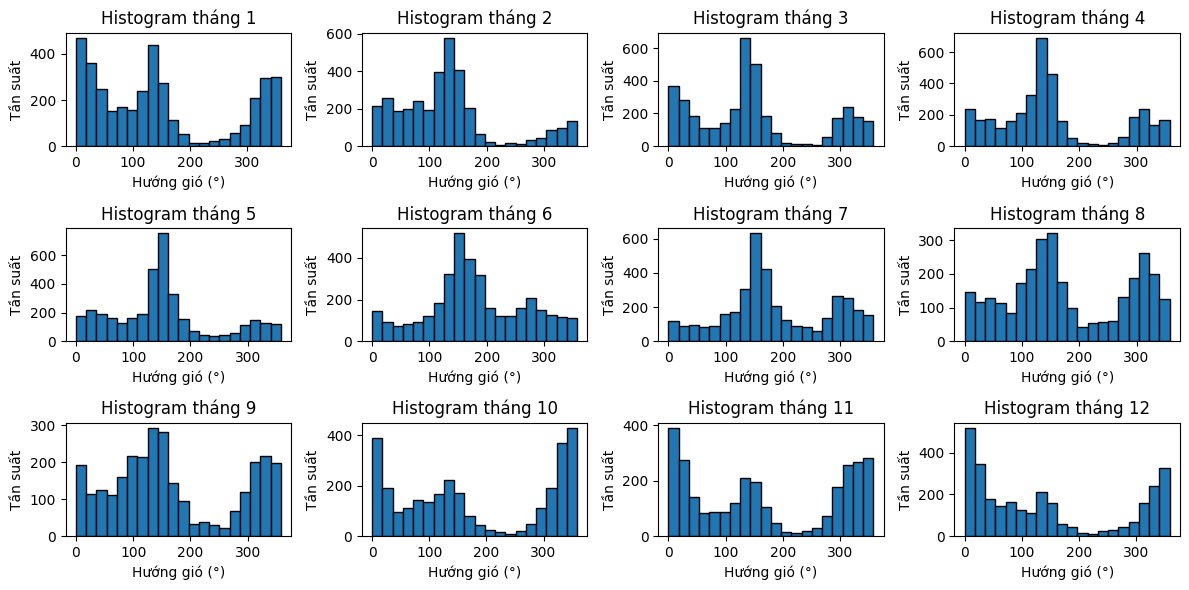

In [136]:
group_HN = df_HN.groupby(df['time'].dt.month)
plt.figure(figsize=(12, 6))
for month, group in group_HN:
    plt.subplot(3, 4, month)  # Tạo subplot cho từng tháng
    plt.hist(group["winddirection_10m"], bins=20, edgecolor="black")
    plt.title(f"Histogram tháng {month}")
    plt.xlabel("Hướng gió (°)")
    plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()

Có sự thay đổi của hướng gió chủ yếu qua các tháng:
- Từ tháng 2 đến tháng 7 chủ yếu hướng gió ~150°, tức hướng gió ĐÔNG NAM
- Từ tháng 8, bắt đầu xuất hiện gió có hướng ~300° mạnh hơn, tức từ phía TÂY BẮC
- Đến tháng 10, gió ĐÔNG NAM suy yếu, gió hướng TÂY BẮC dần chuyển hướng thành gió từ phía Bắc, trong khoảng 350° và 0°.
- Từ tháng 11 đến tháng 12, xuất hiện thêm các hướng gió từ phía ĐÔNG BẮC đến hết tháng 1.
- Tháng 1 bắt đầu hình thành lại gió ĐÔNG NAM.
